# DESAFIO ANALISIS PREDICTIVO

Crear un modelo propio desde cero. 

## Modelado con ARIMA de una serie temporal del consumo energético por hora 

Tendrás que crear un modelo ARIMA para analizar la serie temporal. Para ello, usaremos datos de acceso público de la página Kaggle (una web donde se publican conjuntos de datos de acceso libre y se organizan competiciones de ciencia de datos con premios. ¡Échele un vistazo!).

La frecuencia de consumo energético viene determinada en horas. Los datos corresponden a una región de los Estados Unidos y han sido recabados por una compañía eléctrica local.

## Conjunto de datos

El conjunto contiene los datos del consumo energético por hora de ComEd, la compañía eléctrica de Chicago. Para más información, haga clic [aquí](https://www.kaggle.com/robikscube/hourly-energy-consumption). Si quiere poner a prueba sus aptitudes, puede descargar conjuntos de datos de otras eléctricas de la página de Kaggle. 

La frecuencia de consumo está determinada en horas, pero puede modificarla para construir su modelo, si así lo desea. Puede probar a crear varios modelos con distintas frecuencias de consumo. Por ejemplo, podría pasar los datos a una frecuencia determinada en días o meses. ¿Qué aspecto tiene la serie temporal de frecuencia mensual? ¿Qué patrones observa?

## Actividad

Tendrás que importar el conjunto de datos CSV mencionado arriba. Luego, le recomendamos que repita el proceso de principio a fin, que incluye los siguientes pasos: 

* Importa los datos.
* Analiza los datos a través de tablas y gráficas (usa `matplotlib` y `Pandas`).
* Trata de variar la frecuencia de los datos de consumo energético para obtener distintas gráficas: los datos reflejan el consumo energético por hora, pero también puedes cambiar la frecuencia para que venga determinada en días o meses. ¿Qué patrones observa?
* Ejecutar al menos un algoritmo de _machine learning_ en el conjunto de datos (por ejemplo, ARIMA).
* Comprobar el rendimiento del modelo. ¿Cómo podemos evaluar el rendimiento de un modelo de serie temporal? Pruebe a dividir los datos en entrenamiento y prueba.
* Al final del análisis agrega celdas para contestar las siguientes preguntas:
 
Limitaciones del modelo:
¿Qué limitaciones identificas en el modelo que creaste?
¿Cómo crees que podrían mejorarse los resultados o el enfoque metodológico que utilizaste?

Influencia de factores externos:
¿Qué otros factores crees que podrían estar influyendo en los resultados y que no están considerados en el conjunto de datos proporcionado?
¿Cómo integrarías estas variables adicionales en el modelo, si estuvieran disponibles?

Calidad de los datos:
¿Detectaste problemas en la calidad de los datos proporcionados (datos faltantes, valores atípicos, etc.)?
¿Qué impacto podrían tener estos problemas en el rendimiento del modelo y cómo los abordaste?

Patrones observados:
¿Qué patrones identificaste en los datos durante el análisis exploratorio?
¿Cómo utilizaste esos patrones para informar la construcción de tu modelo?

Frecuencia de los datos:
Al cambiar la frecuencia de los datos (diaria, semanal, mensual), ¿qué diferencias observaste en el rendimiento o las tendencias detectadas por el modelo?
Según tu análisis, ¿cuál crees que es la frecuencia más adecuada para este conjunto de datos y por qué?


## Pistas

Tendrás que crear un modelo ARIMA para la predicción de series temporales a partir del conjunto de datos proporcionado. Estos son algunos de los aspectos que debe tener en cuenta:

* No disponemos de variable de resultado o dependiente porque se trata de una serie temporal.
* Puede usar tanto `statsmodels` como [Facebook Prophet](https://medium.com/swlh/facebook-prophet-426421f7e331).
* Kaggle permite a los usuarios publicar sus cuadernos con las soluciones para los distintos conjuntos de la web. Si en algún momento siente que no avanzas en tu desafio, puedes [consultar las soluciones de otras personas para inspirarse](https://www.kaggle.com/c/GiveMeSomeCredit/code). 

## ¡Manos a la obra! 

In [32]:
# python 3.8.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv("COMED_hourly.csv")

# visualizamos algunos datos:
print(data.head())

              Datetime  COMED_MW
0  2011-12-31 01:00:00    9970.0
1  2011-12-31 02:00:00    9428.0
2  2011-12-31 03:00:00    9059.0
3  2011-12-31 04:00:00    8817.0
4  2011-12-31 05:00:00    8743.0


Vemos que tenemos un número identificador, una fecha y hora, y el consumo energético.

In [34]:
data = data.dropna() # eliminamos duplicados
data['Datetime'] = pd.to_datetime(data['Datetime']) # vamos a cambiar el formato a algo que nos permita separar meses, horas, etc.
print(data.head())

             Datetime  COMED_MW
0 2011-12-31 01:00:00    9970.0
1 2011-12-31 02:00:00    9428.0
2 2011-12-31 03:00:00    9059.0
3 2011-12-31 04:00:00    8817.0
4 2011-12-31 05:00:00    8743.0


In [35]:
print(data['COMED_MW'].describe()) # sacamos algunos valores estadísticos rápidamente
max_consumo = data.loc[data['COMED_MW'].idxmax()]
min_consumo = data.loc[data['COMED_MW'].idxmin()]
print(f"día y hora de consumo máximo: {max_consumo['COMED_MW']} en {max_consumo['Datetime']}")
print(f"día y hora de consumo mínimo: {min_consumo['COMED_MW']} en {min_consumo['Datetime']}")

count    66497.000000
mean     11420.152112
std       2304.139517
min       7237.000000
25%       9780.000000
50%      11152.000000
75%      12510.000000
max      23753.000000
Name: COMED_MW, dtype: float64
consumo máximo: 23753.0 en 2011-07-20 18:00:00
consumo mínimo: 7237.0 en 2014-05-25 07:00:00


Vemos aquí que la fecha y hora se imprimen juntas. Esto podría ser molesto para extraer cierta información útil, por lo que conviene separarla:

In [62]:
# como vemos 

data['hour'] = data['Datetime'].dt.hour
data['day'] = data['Datetime'].dt.day
data['month'] = data['Datetime'].dt.month
data['year'] = data['Datetime'].dt.year

print(data.head())

             Datetime  COMED_MW  hour  day  month  year
0 2011-12-31 01:00:00    9970.0     1   31     12  2011
1 2011-12-31 02:00:00    9428.0     2   31     12  2011
2 2011-12-31 03:00:00    9059.0     3   31     12  2011
3 2011-12-31 04:00:00    8817.0     4   31     12  2011
4 2011-12-31 05:00:00    8743.0     5   31     12  2011


In [63]:
#con esto, imprimiremos información útil:

promedio_mes = data.groupby('month')['COMED_MW'].mean()
print(f"promedio de consumo por hora: {promedio_mes}")
print(f"Mes de mayor consumo: {promedio_mes.idxmax()}")
print(f"Mes de menor consumo: {promedio_mes.idxmin()}")

promedio de consumo por hora: month
1     11950.614855
2     11625.380162
3     10734.586642
4      9995.937847
5     10435.957325
6     12176.685243
7     13564.192540
8     12987.270687
9     11386.256944
10    10122.947965
11    10545.020829
12    11390.844854
Name: COMED_MW, dtype: float64
Mes de mayor consumo: 7
Mes de menor consumo: 4


Así mismo, podemos imprimir ahora la información según distintas variables. Ahora hagamos algunos gráficos:

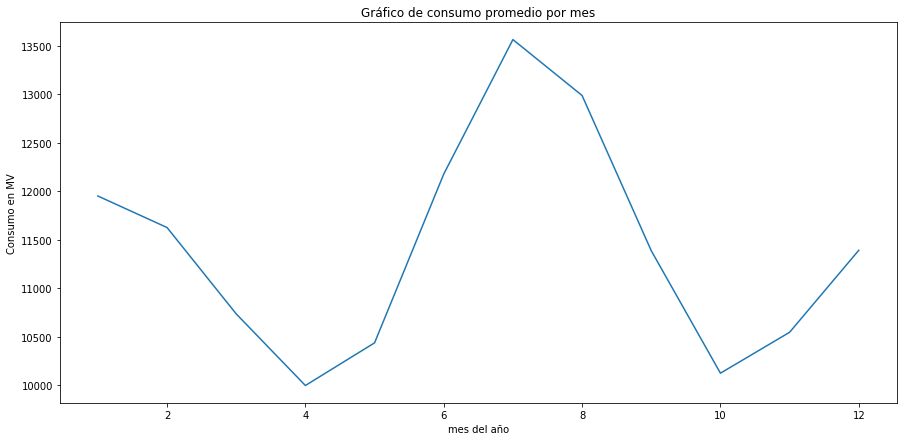

In [64]:
plt.figure(figsize=(15, 7))
sns.lineplot(x =promedio_mes.index, y = promedio_mes.values)
plt.title("Gráfico de consumo promedio por mes")
plt.xlabel("mes del año")
plt.ylabel("Consumo en MV")
plt.show()


Aquí es más fácil ver la información del promedio de consumo mensual. Si queremos ver esto a lo largo de los años:

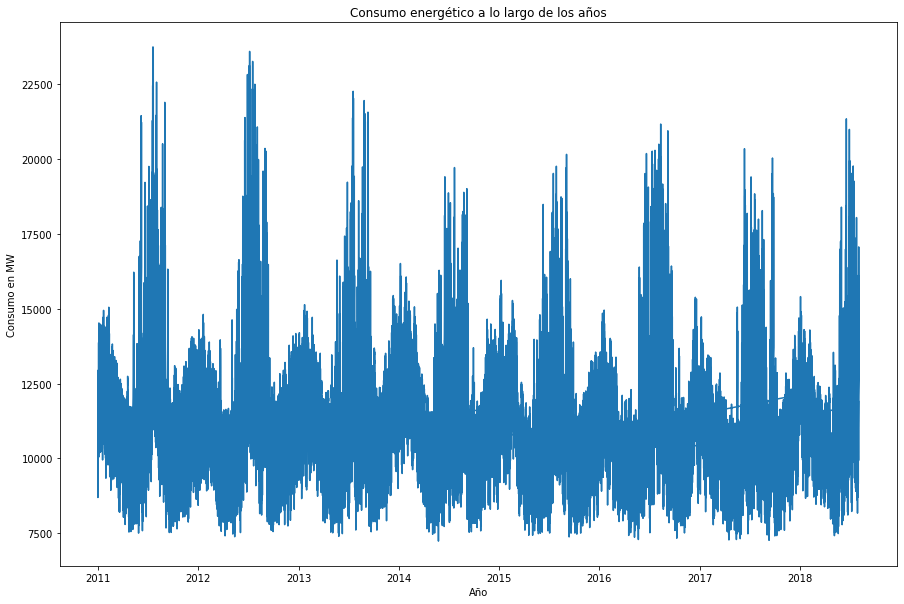

In [68]:
# graficamos por año:
# 
plt.figure(figsize=(15, 10))
plt.plot(data['Datetime'], data['COMED_MW'])
plt.title("Consumo energético a lo largo de los años")
plt.xlabel("Año")
plt.ylabel("Consumo en MW")
plt.show()

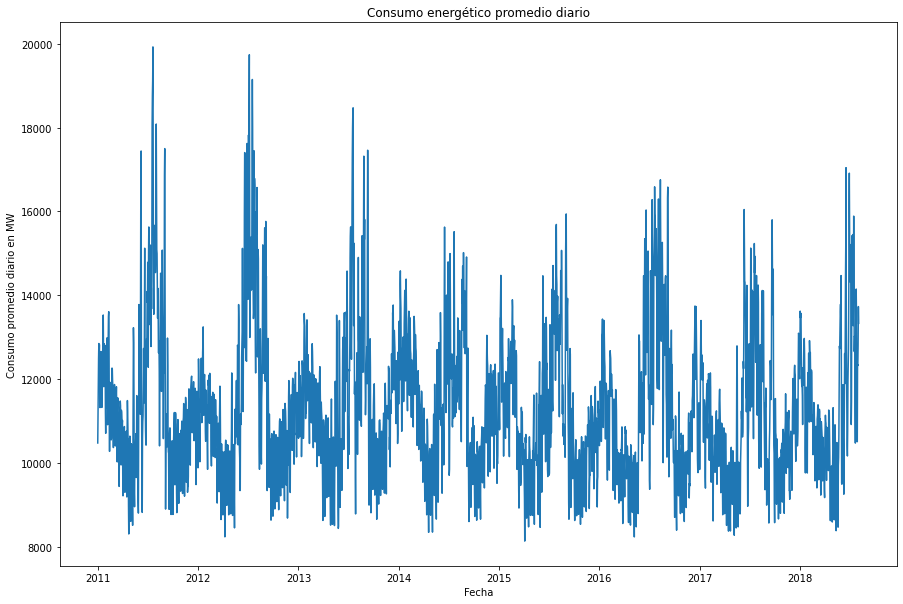

In [73]:
# podemos rehacer el gráfico anterior para que se entienda mejor.

# vamos a tomar el promedio por día de consumo:
data['Date'] = data['Datetime'].dt.date

# Agrupar por día y calcular el promedio del consumo diario
data_daily = data.groupby('Date')['COMED_MW'].mean().reset_index()

plt.figure(figsize=(15, 10))
plt.plot(data_daily['Date'], data_daily['COMED_MW'])
plt.title("Consumo energético promedio diario")
plt.xlabel("Fecha")
plt.ylabel("Consumo promedio diario en MW")
plt.show()

Y aquí vemos que la tendencia de la subida de energía a mitad de año y otro máximo local a inicio de año.

In [66]:
# y podemos analizar los datos en una tabla para una mejor visualización:
consumo_por_mes_anio = data.groupby(['year', 'month'])['COMED_MW'].mean().unstack()
print(consumo_por_mes_anio)

month            1             2             3             4             5   \
year                                                                          
2011   12252.029610  11820.212798  11028.816958  10229.681944  10429.517473   
2012   11569.811828  11299.327586  10485.581427   9846.426389  10904.908602   
2013   11855.229839  11876.825893  11113.010767  10287.122222  10576.762097   
2014   12864.141129  12432.812500  11296.674293  10047.816667  10413.401882   
2015   12030.110215  12358.843750  10766.161507   9825.025000  10204.267473   
2016   11654.358871  11243.501437  10182.989233   9964.718056  10249.063172   
2017   11487.245968  10645.215774  10512.955585   9626.245833   9856.826613   
2018   11892.396505  11351.584821  10490.503365  10140.466667  10852.911290   

month            6             7             8             9             10  \
year                                                                          
2011   12261.277778  15012.403226  13534.995968  10

In [53]:
# otra información útil:

promedio_hora = data.groupby('hour')['COMED_MW'].mean()
print(f"promedio de consumo por hora: {promedio_hora}")
print(f"Mes de mayor consumo: {promedio_hora.idxmax()}")
print(f"Mes de menor consumo: {promedio_hora.idxmin()}")

promedio de consumo por hora: hour
0     11271.850595
1     10487.464453
2      9911.372294
3      9541.342381
4      9304.747023
5      9215.146157
6      9347.616023
7      9816.180079
8     10578.081198
9     11159.382894
10    11569.594370
11    11893.320101
12    12178.442800
13    12340.653194
14    12438.949116
15    12540.006496
16    12559.719957
17    12573.493324
18    12708.983039
19    12828.555395
20    12715.985204
21    12601.970408
22    12456.346445
23    12039.568026
Name: COMED_MW, dtype: float64
Mes de mayor consumo: 19
Mes de menor consumo: 5


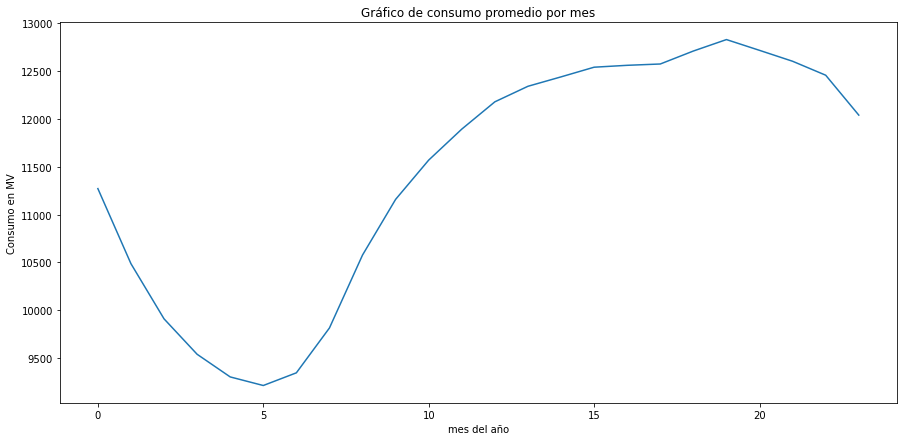

In [54]:
plt.figure(figsize=(15, 7))
sns.lineplot(x =promedio_hora.index, y = promedio_hora.values)
plt.title("Gráfico de consumo promedio por mes")
plt.xlabel("mes del año")
plt.ylabel("Consumo en MV")
plt.show()

## ARIMA:

In [189]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [176]:
data1 = data.drop(columns=['Datetime', 'Date'])
data1.head()

,COMED_MW,hour,day,month,year
0,9970.0,1,31,12,2011
1,9428.0,2,31,12,2011
2,9059.0,3,31,12,2011
3,8817.0,4,31,12,2011
4,8743.0,5,31,12,2011


In [190]:
# vamos a tratar de predecir el consumo por fecha:

#vamos a separar en entrenamiento y testeo. Como el futuro es lo último de data,
# no vamos a mezclar de forma random.

train, test = train_test_split(data_daily, test_size=0.2, shuffle=False)
print(test)

                COMED_MW
Date                    
2017-01-26  11575.208333
2017-01-27  11893.500000
2017-01-28  11118.166667
2017-01-29  10604.208333
2017-01-30  11979.500000
...                  ...
2018-07-30  12354.958333
2018-07-31  12330.541667
2018-08-01  12820.416667
2018-08-02  13735.041667
2018-08-03  13335.000000

[555 rows x 1 columns]


In [191]:
from statsmodels.tsa.stattools import adfuller

# hacemos algunas pruebas sobre los parámetros a elegir

result = adfuller(train['COMED_MW'])
print(f"p-value: {result[1]}")

p-value: 0.00023600764345859388


In [192]:
best_aic = float('inf')
best_params = None

for p in range(6):
    for d in range(2):  # Usualmente d = 0 o 1
        for q in range(6):
            try:
                model = ARIMA(train['COMED_MW'], order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_params = (p, d, q)
            except:
                continue

print(f"Mejores parámetros (p, d, q): {best_params}")


c:\Users\kaori\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\kaori\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\kaori\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\kaori\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\kaori\AppData\Local\Programs\Python\Python38\lib\site-p

Mejores parámetros (p, d, q): (5, 0, 4)


c:\Users\kaori\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [193]:
# variables modificables:

p = 5
d = 0
q = 4

model = ARIMA(train['COMED_MW'], order=(p, d, q))
model_fit = model.fit()

# Predicciones
forecast = model_fit.forecast(steps=len(test))
forecast


c:\Users\kaori\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\kaori\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\kaori\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\kaori\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2017-01-26    11610.892999
2017-01-27    11537.949182
2017-01-28    10608.143993
2017-01-29    10328.550573
2017-01-30    11151.831080
                  ...     
2018-07-30    11639.058648
2018-07-31    11524.133564
2018-08-01    11289.748745
2018-08-02    11508.844362
2018-08-03    11645.147677
Freq: D, Name: predicted_mean, Length: 555, dtype: float64

In [194]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               COMED_MW   No. Observations:                 2217
Model:                 ARIMA(5, 0, 4)   Log Likelihood              -17947.106
Date:                Sun, 26 Jan 2025   AIC                          35916.211
Time:                        19:19:53   BIC                          35978.954
Sample:                    01-01-2011   HQIC                         35939.129
                         - 01-25-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.148e+04   2338.094      4.909      0.000    6894.595    1.61e+04
ar.L1          1.7607      0.016    113.196      0.000       1.730       1.791
ar.L2         -2.1645      0.019   -113.907      0.0

In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# calculamos algunas métricas para ver el desempeño.

mse = mean_squared_error(test['COMED_MW'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['COMED_MW'], forecast)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1582.2618814337625
MAE: 1286.9097672602418


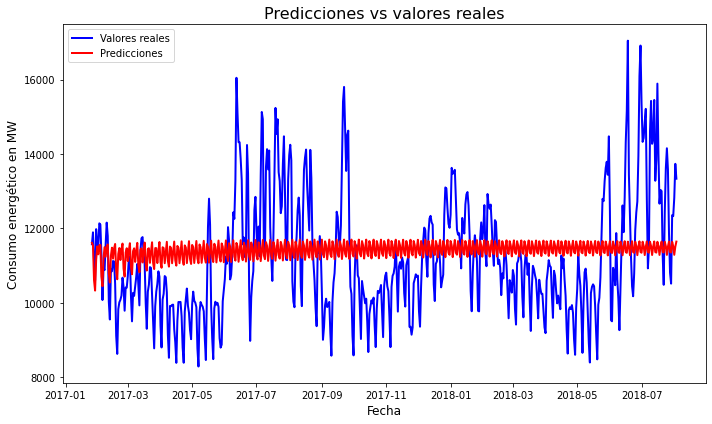

In [196]:
y_pred = forecast 
y_true = test['COMED_MW'] # guardamos el valor para graficar.


plt.figure(figsize=(10, 6))
plt.plot(y_true.index, y_true, label='Valores reales', color='blue', linewidth=2)
plt.plot(y_true.index, y_pred, label='Predicciones', color='red', linewidth=2)

plt.title('Predicciones vs valores reales', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Consumo energético en MW', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


Con este modelo no logramos seguir el patrón de consumo. Podemos probar otro modelo.

In [168]:
data2 = data.drop(columns=['Datetime', 'Date'])
data2.head()

,COMED_MW,hour,day,month,year
0,9970.0,1,31,12,2011
1,9428.0,2,31,12,2011
2,9059.0,3,31,12,2011
3,8817.0,4,31,12,2011
4,8743.0,5,31,12,2011


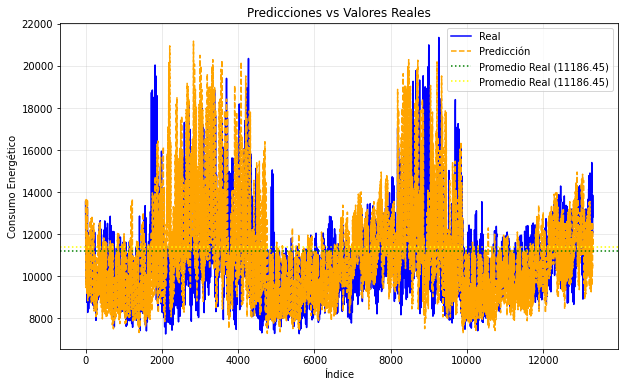

In [188]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = data2[['hour', 'day', 'month', 'year']]  # Las variables predictoras, quitamos algunas
y = data2['COMED_MW']  # La variable a predecir

# entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# entrenar y testear
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# graficamos:

# Calcular el promedio de los valores reales
mean_real = np.mean(y_test.values)
mean_pred = np.mean(y_pred_tree)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real', color='blue')
plt.plot(y_pred_tree, label='Predicción', linestyle='--', color='orange')
plt.axhline(mean_real, color='green', linestyle=':', label=f'Promedio Real ({mean_real:.2f})')
plt.axhline(mean_pred, color='yellow', linestyle=':', label=f'Promedio Real ({mean_real:.2f})')
plt.title("Predicciones vs Valores Reales")
plt.xlabel("Índice")
plt.ylabel("Consumo Energético")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [185]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_tree)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred_tree)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, y_pred_tree)
print(f"R-Squared (R²): {r2}")


Mean Absolute Error (MAE): 1422.842030075188
Mean Squared Error (MSE): 3924729.168195489
R-Squared (R²): 0.18574676603691653


Vemos que este modelo es mucho mejor que el anterior, aunque el r^{2} y MSE entregaron valores insuficientes.